<a href="https://colab.research.google.com/github/HanielPro/SleepHealth-Study-ML/blob/main/extra/emotion-post-social-media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# 1. Importando o dataset Localmente
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("emirhanai/social-media-usage-and-emotional-well-being")

# Get the CSV file path
# Assuming the CSV file is named "Sleep_health_and_lifestyle_dataset.csv"
# and it's located in the downloaded dataset directory.
file_path_1 = os.path.join(path, "test.csv")
file_path_2 = os.path.join(path, "train.csv")



In [99]:
# Extra: Desabilitar mensagens de Warning
import warnings
warnings.filterwarnings("ignore")


In [100]:
# 2. transformando o dataset importando  em um dataframe
import pandas as pd

test_df = pd.read_csv(file_path_1)  # Use the file path here
train_df = pd.read_csv(file_path_2)  # Use the file path here

#Irei mesclar os dois pq não acho viável estarem separados
data =  pd.concat([test_df,train_df], ignore_index=True)

display(data.head(20))

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
1,488,21,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
2,776,28,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety
3,869,27,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety
4,573,21,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral
5,428,25,Female,Instagram,160.0,6.0,85.0,26.0,30.0,Happiness
6,528,25,Female,Instagram,160.0,6.0,85.0,26.0,30.0,Happiness
7,773,21,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral
8,382,24,Non-binary,Snapchat,85.0,3.0,33.0,20.0,18.0,Happiness
9,505,33,Male,LinkedIn,45.0,1.0,10.0,5.0,12.0,Boredom


In [101]:
# 3 - Remover Colunas desnecessárias

if 'User_ID' in data.columns:
  data.drop(columns=['User_ID'], inplace=True)

if 'Age' in data.columns:
  # 4 - Age existe algumas colunas em que idade foi trocada pelo gênero. Irei remover essas linhas
  data = data[pd.to_numeric(data["Age"], errors="coerce").notna()]

  # Convertendo "Age" para inteiro, se der erro é pq n funcionou
  data["Age"] = data["Age"].astype(int)

if 'Gender' in data.columns:
  #5 - Existe inconsistências no gênero, alguns são valores numéricos
  data.loc[~data['Gender'].isin(['Female','Male','Non-binary','Neutral']), 'Gender'] = 'nan'


In [102]:
#Definindo qual será a coluna Target

target_col ="Dominant_Emotion" # Deixarei como uma variável, caso seja preciso mudar, algum dia...
data[target_col].info()

<class 'pandas.core.series.Series'>
Index: 1026 entries, 0 to 1103
Series name: Dominant_Emotion
Non-Null Count  Dtype 
--------------  ----- 
1026 non-null   object
dtypes: object(1)
memory usage: 16.0+ KB


In [103]:
#Checando informações do dataframe
data.info()
display(data.head(20))

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 0 to 1103
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1026 non-null   int64  
 1   Gender                      1026 non-null   object 
 2   Platform                    1026 non-null   object 
 3   Daily_Usage_Time (minutes)  1026 non-null   float64
 4   Posts_Per_Day               1026 non-null   float64
 5   Likes_Received_Per_Day      1026 non-null   float64
 6   Comments_Received_Per_Day   1026 non-null   float64
 7   Messages_Sent_Per_Day       1026 non-null   float64
 8   Dominant_Emotion            1026 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 80.2+ KB


,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
1,21,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
2,28,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety
3,27,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety
4,21,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral
5,25,Female,Instagram,160.0,6.0,85.0,26.0,30.0,Happiness
6,25,Female,Instagram,160.0,6.0,85.0,26.0,30.0,Happiness
7,21,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral
8,24,Non-binary,Snapchat,85.0,3.0,33.0,20.0,18.0,Happiness
9,33,Male,LinkedIn,45.0,1.0,10.0,5.0,12.0,Boredom


# Pré-Processamento



In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
oneHot_encoder = OneHotEncoder()
#🔥

# 1 - Transformar todos os atributos para numérico

# a - Gender -> Label

# a - Gender -> One Hot Encode
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].astype(str)
    encoded = pd.get_dummies(data['Gender'], prefix='Gender')
    data = pd.concat([data.drop(columns=['Gender']), encoded], axis=1)

# a - Gender -> Label
#if 'Gender' in data.columns:
#    data['Gender'] = label_encoder.fit_transform(data['Gender'])

# b - Platform -> One Hot Encode
if 'Platform' in data.columns:
    data['Platform'] = data['Platform'].astype(str)
    encoded = pd.get_dummies(data['Platform'], prefix='Platform')
    data = pd.concat([data.drop(columns=['Platform']), encoded], axis=1)

data.info()
display(data)


<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 0 to 1103
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1026 non-null   int64  
 1   Daily_Usage_Time (minutes)  1026 non-null   float64
 2   Posts_Per_Day               1026 non-null   float64
 3   Likes_Received_Per_Day      1026 non-null   float64
 4   Comments_Received_Per_Day   1026 non-null   float64
 5   Messages_Sent_Per_Day       1026 non-null   float64
 6   Dominant_Emotion            1026 non-null   object 
 7   Gender_Female               1026 non-null   bool   
 8   Gender_Male                 1026 non-null   bool   
 9   Gender_Non-binary           1026 non-null   bool   
 10  Gender_nan                  1026 non-null   bool   
 11  Platform_Facebook           1026 non-null   bool   
 12  Platform_Instagram          1026 non-null   bool   
 13  Platform_LinkedIn           1026 non-n

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary,Gender_nan,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,27,120.0,4.0,40.0,18.0,22.0,Neutral,True,False,False,False,False,False,False,True,False,False,False
1,21,60.0,1.0,18.0,7.0,12.0,Neutral,False,False,True,False,False,False,False,True,False,False,False
2,28,115.0,3.0,38.0,18.0,27.0,Anxiety,False,False,True,False,False,False,False,True,False,False,False
3,27,105.0,3.0,48.0,20.0,28.0,Anxiety,False,True,False,False,False,False,False,False,True,False,False
4,21,55.0,3.0,17.0,7.0,12.0,Neutral,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,33,85.0,4.0,35.0,18.0,18.0,Boredom,False,False,True,False,False,False,False,False,False,True,False
1100,22,70.0,1.0,14.0,6.0,10.0,Neutral,True,False,False,False,True,False,False,False,False,False,False
1101,35,110.0,3.0,50.0,25.0,25.0,Happiness,False,True,False,False,False,False,False,False,False,False,True
1102,28,60.0,2.0,18.0,8.0,18.0,Anger,False,False,True,False,False,False,False,False,True,False,False


In [105]:
# 2 - Transformar os labels em numérico
# Check basic data summary for numeric variables

# Deixarei como uma variável, caso seja preciso mudar, algum dia
data[target_col] = label_encoder.fit_transform(data[target_col])

#display(data[target_col])

print(f" a coluna target {target_col}, está transformarda em valores numérios: {data[target_col].dtype}")

 a coluna target Dominant_Emotion, está transformarda em valores numérios: int64


In [106]:
# 3 - Normalizar os atributos na escala 0..1
from sklearn.preprocessing import MinMaxScaler

# Min- Max
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)
#data_normalized.drop(columns=[target_col], inplace=True)

#display(data_normalized)

display(data_normalized.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,1026.0,0.463381,0.279375,0.0,0.214286,0.428571,0.642857,1.0
Daily_Usage_Time (minutes),1026.0,0.346308,0.242233,0.0,0.156250,0.281250,0.500000,1.0
Posts_Per_Day,1026.0,0.328321,0.274872,0.0,0.142857,0.285714,0.428571,1.0
Likes_Received_Per_Day,1026.0,0.328776,0.252276,0.0,0.123810,0.238095,0.428571,1.0
Comments_Received_Per_Day,1026.0,0.355674,0.233233,0.0,0.157895,0.315789,0.526316,1.0
Messages_Sent_Per_Day,1026.0,0.342105,0.203360,0.0,0.214286,0.333333,0.476190,1.0
Dominant_Emotion,1026.0,0.529240,0.328222,0.0,0.200000,0.600000,0.800000,1.0
Gender_Female,1026.0,0.359649,0.480132,0.0,0.000000,0.000000,1.000000,1.0
Gender_Male,1026.0,0.368421,0.482612,0.0,0.000000,0.000000,1.000000,1.0
Gender_Non-binary,1026.0,0.270955,0.444670,0.0,0.000000,0.000000,1.000000,1.0


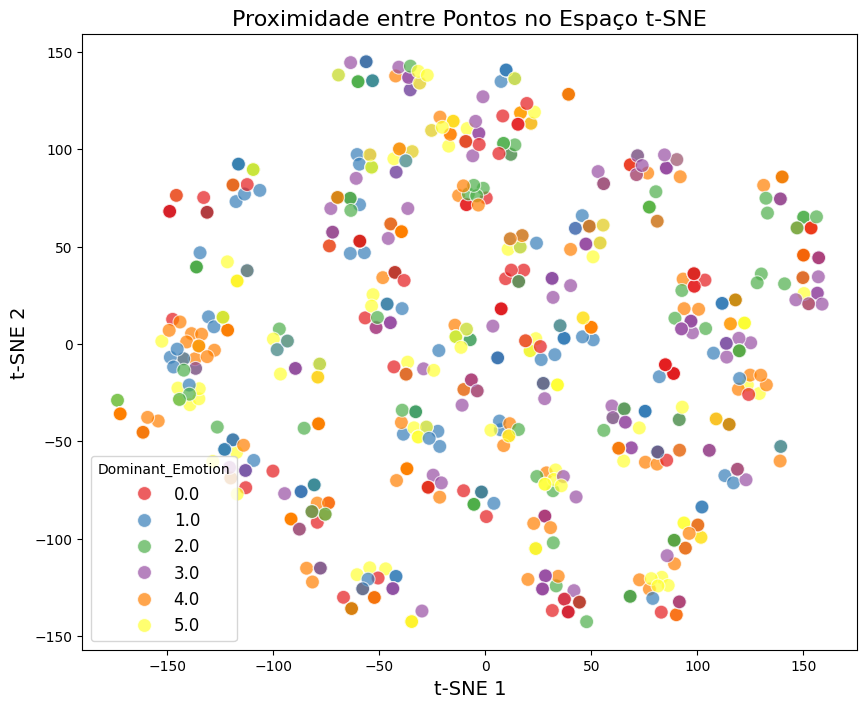

In [107]:
#Visualização do Dataset de acordo com a coluna escolhida como target.
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# O t-SNE é uma técnica de redução de dimensionalidade que projeta os dados de um espaço de alta dimensão
# para um espaço de baixa dimensão (geralmente 2D ou 3D). Aqui, estamos reduzindo para 2 dimensões.

tsne = TSNE(n_components=2, random_state=50)  # Definindo que queremos 2 dimensões
tsne_result = tsne.fit_transform(data)  # Aplicando o t-SNE para reduzir a dimensionalidade

# 4. Criando um DataFrame com os resultados do t-SNE
# O t-SNE nos dá duas componentes principais para cada ponto (tSNE1 e tSNE2),
# que agora podemos usar para plotar os pontos no gráfico.
tsne_df = pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])

# 5. Criando o gráfico de dispersão (scatter plot)
# Vamos usar o Seaborn para plotar os resultados, onde 'tSNE1' será o eixo X e 'tSNE2' será o eixo Y.

plt.figure(figsize=(10, 8))  # Definindo o tamanho da figura para um gráfico mais legível
sns.scatterplot(x='tSNE1', y='tSNE2', data=tsne_df,
                hue=data[target_col],  # Cor dos pontos baseada na target_col
                palette='Set1',  # Usando uma paleta de cores
                s=100,  # Definindo o tamanho dos pontos
                alpha=0.7)  # Definindo a transparência dos pontos para que sobreponham melhor

# 6. Adicionando título e rótulos
# Definimos um título para o gráfico e rótulos para os eixos X e Y para indicar o que cada eixo representa.
plt.title('Proximidade entre Pontos no Espaço t-SNE', fontsize=16)  # Título do gráfico
plt.xlabel('t-SNE 1', fontsize=14)  # Rótulo do eixo X
plt.ylabel('t-SNE 2', fontsize=14)  # Rótulo do eixo Y

# 7. Ajustando a legenda
# A legenda vai mostrar qual é a relação entre as cores dos pontos e a variável target_col.
plt.legend(title=target_col, loc='best', fontsize=12)  # Adicionando uma legenda

# 8. Exibindo o gráfico
# Por fim, exibimos o gráfico para visualizar as proximidades entre os pontos no espaço 2D gerado pelo t-SNE.
plt.show()


# Construção dos Algoritmos

- Árvore de Decisão (gini e entropy)
- kNN (k igual a 5 e 10)
-MLP (escolher duas arquiteturas diferentes e variar o parâmetro activation =
{‘relu’,’tanh’}). “relu” é o valor default para o parâmetro activation
- K-Means (K igual ao número de classes existente no problema)

In [108]:
# Importando os modelos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

#Método para medir a acurácia
def acc_show(model, name:str, X_test, y_test):
  '''
  Método criado para agilizar quando estiver medindo a acurácia, pode não parecer, mas essas duas linhas são chatinhas de se fazer repetidamente.
  '''
  acc = model.score(X_test, y_test)
  print(f" Acurácia do modelo {name}: ", round(acc , 2 )*100,"%")
  return acc

# target_col será  o nosso target
y = data[target_col]

# O resto é resto
X = data_normalized.drop(target_col, axis=1)

# Separando o conjunto de dados em treinamento e teste usando "train_test_split"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [109]:
# 1) Árvores de Decisão

# a.  Gini
gini_tree = DecisionTreeClassifier(criterion='gini',max_depth=8, random_state=None)
gini_tree.fit(X_train, y_train)

gini_tree_acc= acc_show(gini_tree, "Árvore de Decisão (gini)", X_test, y_test)

# b.  Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=None)
entropy_tree.fit(X_train, y_train)

entropy_tree_acc= acc_show(entropy_tree, "Árvore de Decisão (Entropia)", X_test, y_test)

 Acurácia do modelo Árvore de Decisão (gini):  93.0 %
 Acurácia do modelo Árvore de Decisão (Entropia):  80.0 %


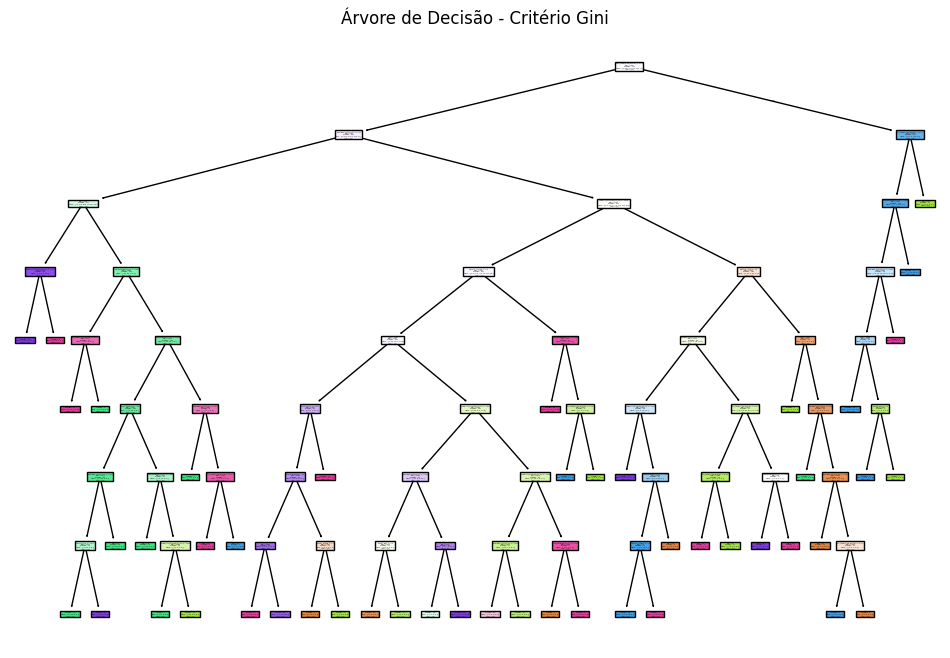

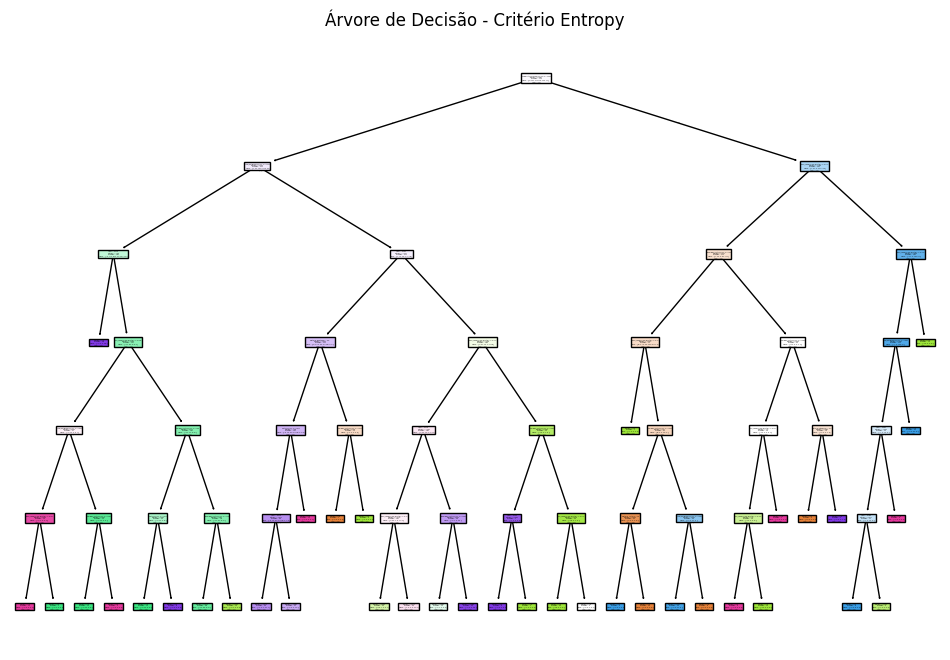

In [110]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Exibir a árvore de decisão com critério Gini
plt.figure(figsize=(12, 8))
plot_tree(gini_tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Árvore de Decisão - Critério Gini")
plt.show()

# Exibir a árvore de decisão com critério Entropy
plt.figure(figsize=(12, 8))
plot_tree(entropy_tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Árvore de Decisão - Critério Entropy")
plt.show()

In [111]:
# 2 -  KNN (k igual a 5 e 10)

k_vizinhos_5=5
k_vizinhos_10=10

# a. Treinar KNN com 5 vizinhos
knn_5_neighbors = KNeighborsClassifier(n_neighbors=k_vizinhos_5)
knn_5_neighbors.fit(X_train, y_train)

acc_knn_5_vizinhos = acc_show(knn_5_neighbors, f"KNN com {k_vizinhos_5} vizinhos", X_test, y_test)

# b. Treinar KNN com 10 vizinhos
knn_10_neighbors = KNeighborsClassifier(n_neighbors=k_vizinhos_10)
knn_10_neighbors.fit(X_train, y_train)

acc_knn_10_vizinhos = acc_show(knn_5_neighbors, f"KNN com {k_vizinhos_10} vizinhos", X_test, y_test)


 Acurácia do modelo KNN com 5 vizinhos:  99.0 %
 Acurácia do modelo KNN com 10 vizinhos:  99.0 %


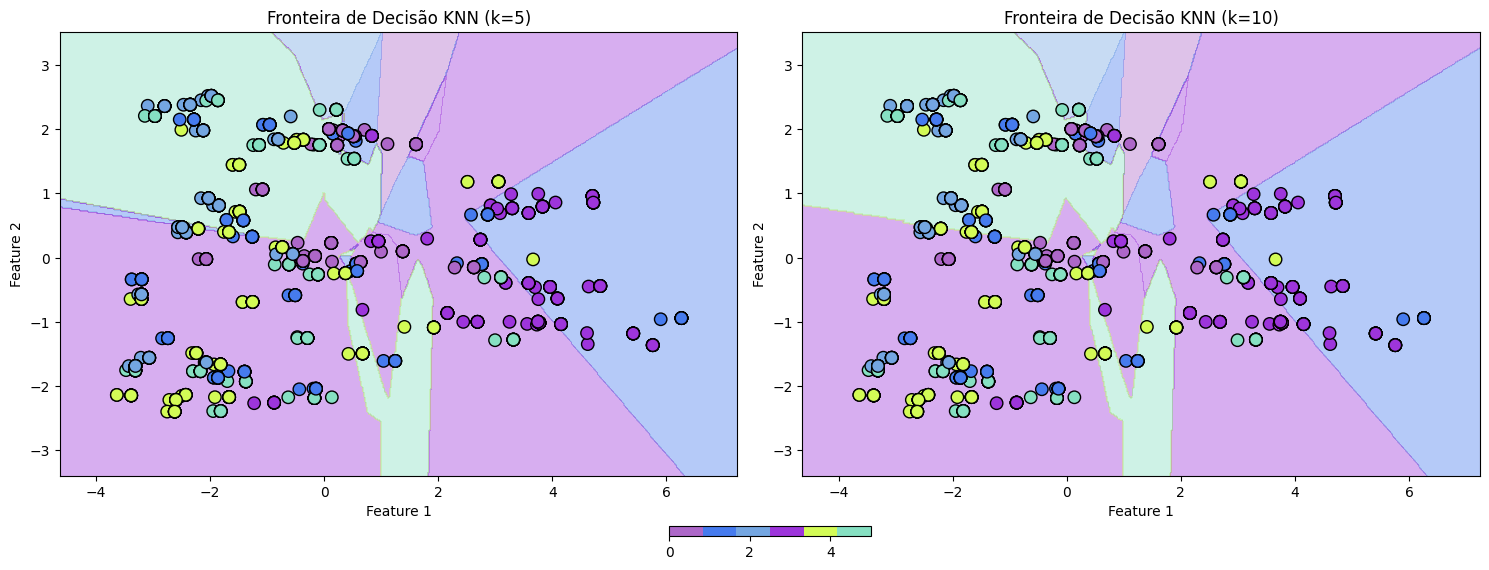

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import random
import matplotlib.pyplot as plt

classes = set(data[target_col])

# Gerando cores aleatórias em formato hexadecimal
colors = {cls: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for cls in classes}.values()
cmap = ListedColormap(list(colors))
def plot_decision_boundary(X, y, clf, k_value, ax):
    '''Função para plotar a fronteira de decisão do modelo KNN'''

    # Ajusta o escalonamento
    X_scaled = StandardScaler().fit_transform(X)

    # Reduz as dimensões para 2 com PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Definir o intervalo da grade
    h = .02  # passo na grade
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Previsões de cada ponto da grade
    Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plota a fronteira de decisão
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

    # Plota os pontos de dados
    # The change is here! Use cmap directly as it is already a ListedColormap
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, edgecolors='k', s=80)

    # Rótulos e título
    ax.set_title(f'Fronteira de Decisão KNN (k={k_value})', fontsize=12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    return scatter

# Definindo os valores de k
k_values = [5, 10]

# Criando a figura e os eixos para plotar as fronteiras de decisão
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Iterar sobre os valores de K para treinar e plotar as fronteiras de decisão
for k in k_values:
    # Treina o classificador KNN para cada valor de k
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plota a fronteira de decisão
    scatter = plot_decision_boundary(X, y, clf, k, axes[k_values.index(k)])

# Exibir a legenda e o gráfico
fig.tight_layout()
fig.colorbar(scatter, ax=axes, orientation="horizontal", fraction=0.02, pad=0.1)
plt.show()

In [113]:
# 3 - MLP (escolher duas arquiteturas diferentes e variar o parâmetro activation = {‘relu’,’tanh’}). “relu” é o valor default para o parâmetro activation'

# Definindo automaticamente a quantidade de nós ocultos (Peguei da internet)

n_features = X_train.shape[1]  # Número de colunas (features)
n_classes = len(np.unique(y_train))  # Número de classes

# Definição do tamanho da camada oculta
hidden_layer_sizes_auto = ( int(n_features * 4), int(np.sqrt(n_features * n_classes)*4.5), int((n_features *1.5) / 2)  )

print(hidden_layer_sizes_auto)

# a - MLP com ReLU - simples
mlp_relu_simple= MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_auto,
    activation='relu',
    solver='adam',
    alpha=0.01,
    max_iter=1200,
    random_state=None,
    shuffle=False # shuffle samples in each iteration
)


# b - MLP com tanh - simples
mlp_tanh_simple = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_auto,
    activation='tanh',
    solver='adam',
    alpha=1,
    max_iter=1200,
    early_stopping=True,
    random_state=None,
    shuffle=False # Mistura os dados a cada época
)

# c - MLP com ReLU - Descida de Gradiente Estocástico e invscaling
mlp_relu_sgd = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_auto,
    activation='relu',
    solver='sgd',  # Usar Stochastic Gradient Descent (SGD)
    alpha=0.01,  # Regularização L2 (evita overfitting)
    learning_rate='invscaling',  # Taxa de aprendizado vai diminuindo ao longo do tempo
    learning_rate_init=0.01,  # Taxa de aprendizado inicial
    power_t=0.2,  # Controla a taxa de diminuição
    max_iter=1200,  #Quantidade Máxima de Iterações permitidas # Changed max_aiter to max_iter
    random_state=None,
    shuffle=True,  # Misturar os dados a cada época
)
# d - MLP com Tanh - Descida de Gradiente Estocástico e com aprendizado em adaptive
mlp_tanh_sgd = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_auto,
    activation='tanh',
    solver='sgd',  # Usar Stochastic Gradient Descent (SGD)
    alpha=0.001,  # Regularização L2 (evita overfitting)
    learning_rate='adaptive',  # Taxa de aprendizado vai diminuindo ao longo do tempo
    learning_rate_init=0.01,  # Taxa de aprendizado inicial
    power_t=0.2,  # Controla a taxa de diminuição
    max_iter=1200,
    random_state=42,
    shuffle=True,  # Misturar os dados a cada época
)


mlp_relu_simple.fit(X_train, y_train)
acc_mlp_relu = acc_show(mlp_relu_simple, "MLP com relu", X_test, y_test)

mlp_relu_sgd.fit(X_train, y_train)
acc_mlp_relu_sgd = acc_show(mlp_relu_sgd, "MLP com relu e solver SGD", X_test, y_test)

mlp_tanh_simple.fit(X_train, y_train)
acc_mlp_tanh = acc_show(mlp_tanh_simple, "MLP com Tanh", X_test, y_test)

mlp_tanh_sgd.fit(X_train, y_train)
acc_mlp_tanh_sgd = acc_show(mlp_tanh_sgd, "MLP com Tanh e Solver SGD", X_test, y_test)


(68, 45, 12)
 Acurácia do modelo MLP com relu:  99.0 %
 Acurácia do modelo MLP com relu e solver SGD:  60.0 %
 Acurácia do modelo MLP com Tanh:  56.00000000000001 %
 Acurácia do modelo MLP com Tanh e Solver SGD:  100.0 %


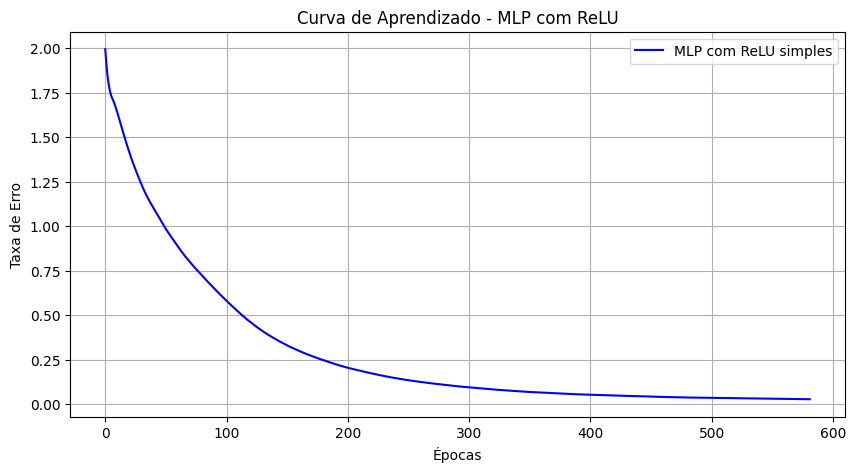

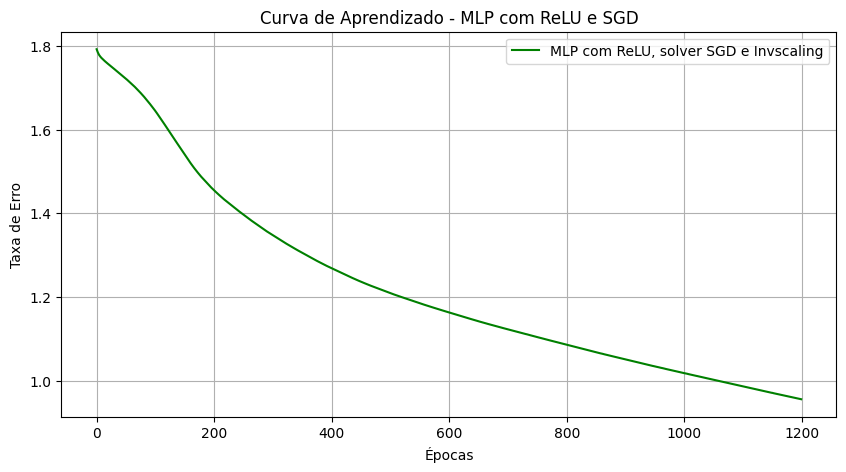

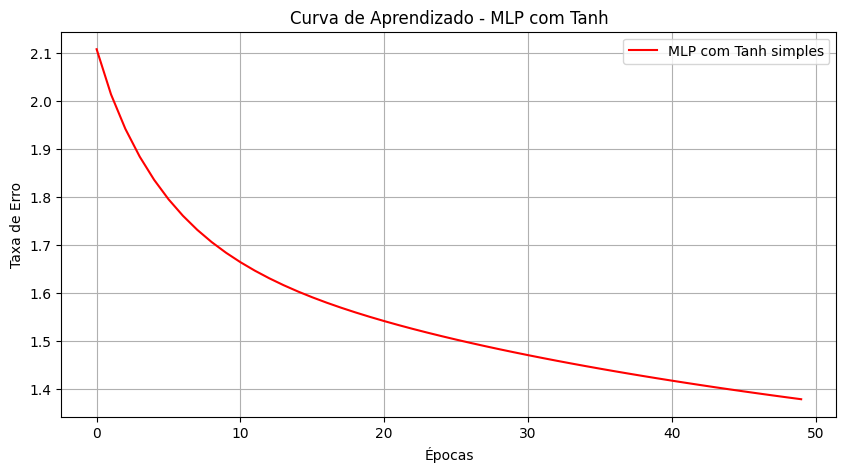

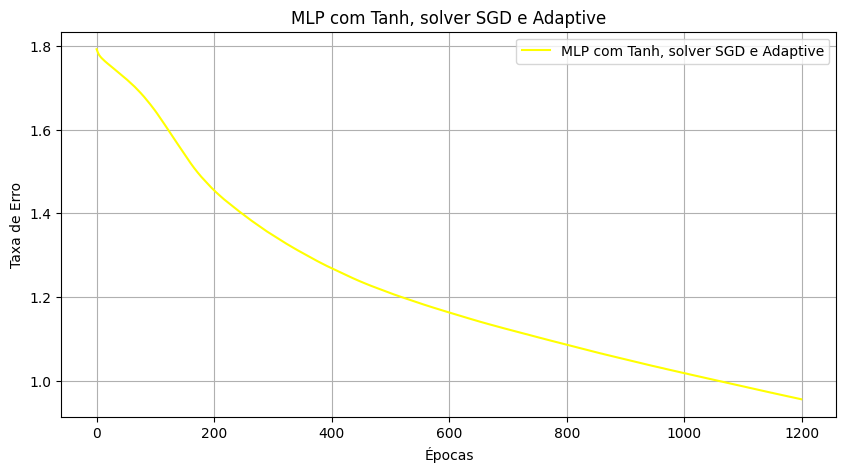

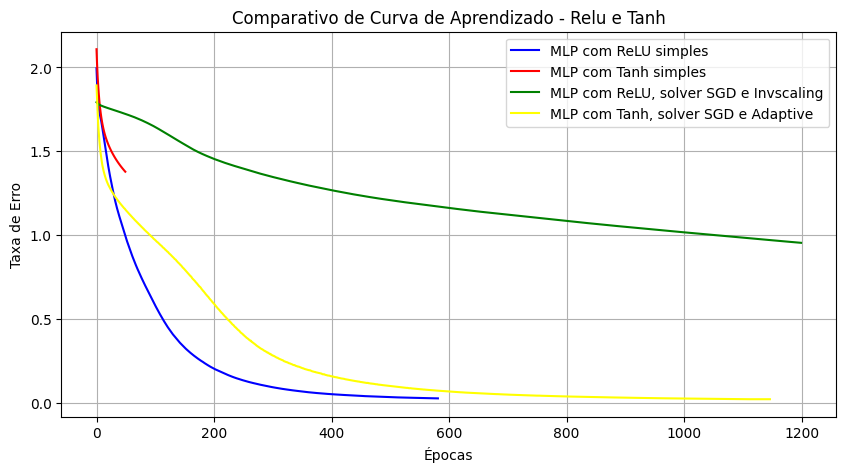

In [114]:
#Visualização da Eficiência do MLP
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

xlabel_t="Épocas"
ylabel_t= "Taxa de Erro"
relu_s_title="Curva de Aprendizado - MLP com ReLU"
tanh_s_title="Curva de Aprendizado - MLP com Tanh"
relu_i_title="Curva de Aprendizado - MLP com ReLU e SGD"
tanh_i_title="Curva de Aprendizado - MLP com Tanh e SGD"

relu_s_label="MLP com ReLU simples"
tanh_s_label="MLP com Tanh simples"
relu_i_label="MLP com ReLU, solver SGD e Invscaling"
tanh_i_label="MLP com Tanh, solver SGD e Adaptive"

relu_s_color="blue"
relu_i_color="green"
tanh_s_color="red"
tanh_i_color="yellow"

# Curva de aprendizado do MLP com ReLU
plt.figure(figsize=(10, 5))
plt.plot(mlp_relu_simple.loss_curve_, label=relu_s_label, color=relu_s_color)  # Access the loss curve for plotting
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title(relu_s_title)
plt.grid()
plt.legend()
plt.show()

# Curva de aprendizado do MLP com Relu e SGD
plt.figure(figsize=(10, 5))
plt.plot(mlp_relu_sgd.loss_curve_, label=relu_i_label, color=relu_i_color)  # Access the loss curve for plotting
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title(relu_i_title)
plt.grid()
plt.legend()
plt.show()

# Curva de aprendizado do MLP com Tanh
plt.figure(figsize=(10, 5))
plt.plot(mlp_tanh_simple.loss_curve_, label=tanh_s_label, color=tanh_s_color)
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title(tanh_s_title)
plt.grid()
plt.legend()
plt.show()

# Curva de aprendizado do MLP com Tanh e SGD
plt.figure(figsize=(10, 5))
plt.plot(mlp_relu_sgd.loss_curve_, label=tanh_i_label, color=tanh_i_color)
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title(tanh_i_label)
plt.grid()
plt.legend()
plt.show()

# Comparando os dois gráficos
plt.figure(figsize=(10, 5))
plt.plot(mlp_relu_simple.loss_curve_, label=relu_s_label, color=relu_s_color)  # Access the loss curve for plotting
plt.plot(mlp_tanh_simple.loss_curve_, label=tanh_s_label, color=tanh_s_color)  # Access the loss curve for plotting
plt.plot(mlp_relu_sgd.loss_curve_, label=relu_i_label, color=relu_i_color)  # Access the loss curve for plotting
plt.plot(mlp_tanh_sgd.loss_curve_, label=tanh_i_label, color=tanh_i_color)  # Access the loss curve for plotting
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title("Comparativo de Curva de Aprendizado - Relu e Tanh")
plt.grid()
plt.legend()
plt.show()


In [115]:
from sklearn.cluster import KMeans


# Definindo as classes do Projeto
classes = set(y_train)

#Definindo a quantidade de clusters
quant_cluster = classes.__len__()

#print(f"Quantidade de clusters: {quant_cluster}")

kmeans = KMeans(n_clusters=quant_cluster, init= "k-means++",
                max_iter=500,
                n_init=10,
                random_state=None)
kmeans.fit(X_train)

from collections import Counter
labels = kmeans.labels_

map_labels = []

for i in range(quant_cluster):
  map_labels.append([])

new_y_train = y_train.to_list()

for i in range(len(y_train)):
  for c in range(quant_cluster):
    if labels[i] == c:
      map_labels[c].append(new_y_train[i])

#print(map_labels)

# Criar dicionário com os labels a serem mapeados
cluster_labels = {}

for i in range(quant_cluster):
  final = Counter(map_labels[i]) # contar a classe que mais aparece
  value = final.most_common(1)[0][0] # retorna a classe com maior frequência
  cluster_labels[i] = value

print(cluster_labels)

# Realizando a Acurácia do Modelo
result = kmeans.predict(X_test)
result = [cluster_labels[i] for i in result]

acc = accuracy_score(result, y_test)
show = round(acc * 100)

print(f" Acurácia do modelo KMeans: {show}%")

{0: 2, 1: 3, 2: 4, 3: 4, 4: 3, 5: 4}
 Acurácia do modelo KMeans: 39%


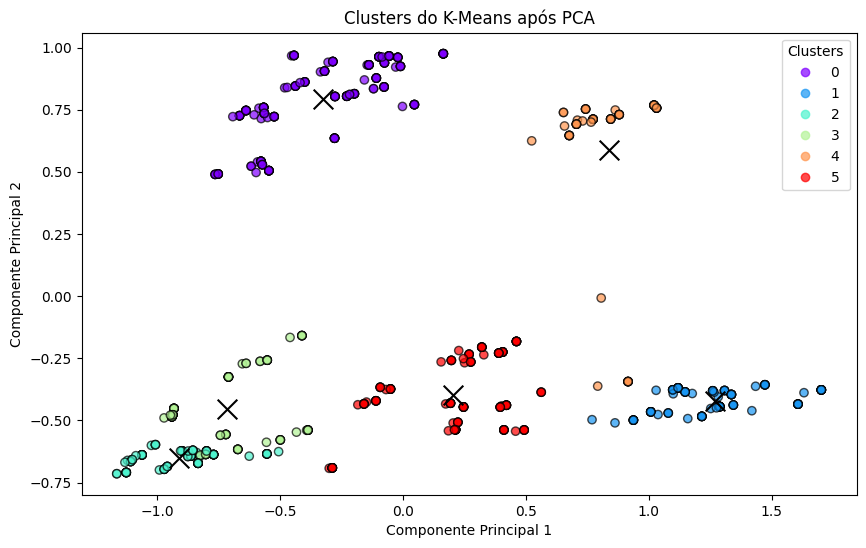

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reduzindo os dados para 2 dimensões com PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Obtendo os rótulos dos clusters
cluster_labels_array = np.array([cluster_labels[label] for label in labels])

# Criando o scatter plot dos clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='k')

# Adicionando centróides
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='black', marker='x', label='Centroids')

# Adicionando legenda dos clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters do K-Means após PCA")
plt.show()


#Protocolo Experimental
Executar um k-fold cross-validation (k = 10), com 90% dos dados para Treinamento e
o restante para Teste.
Cada uma das divisões dos conjuntos deve ser utilizado para treinar cada algoritmo.

In [117]:
from sklearn.model_selection import cross_val_score
# 5) Executar os experimentos 10x usando validação cruzada e mostrar a média das 10 execuções para cada algoritmo de aprendizado

#a) Utilizando cross Validation para encontrar a média da acurácia de cada modelo
def run_experiment(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=20, scoring='accuracy',n_jobs=-1)
    score = scores.mean()
    print(f"Acurácia média do {model_name}: {round(score,2)*100}%")
    return score


#Criando um set com modelos, nomes e acurácia média.
# Por preguiça de fazer algo melhor, deixarei assim
models_dict ={
    "gini_tree": [gini_tree,"Gini Tree",0],
    "entropy_tree": [entropy_tree,"Entropy Tree",0],
    "knn_5_neighbors": [knn_5_neighbors,"KNN com 5 vizinhos",0],
    "knn_10_neighbors": [knn_10_neighbors,"KNN com 10 vizinhos",0],
    "mlp_relu": [mlp_relu_simple,"MLP com relu simples",0],
    "mlp_relu_sgd": [mlp_relu_sgd,"MLP com relu e Descida de Gradiente Estocástico ",0],
    "mlp_tanh": [mlp_tanh_simple,"MLP com tanh simples",0],
    "mlp_tanh_sgd": [mlp_tanh_sgd,"MLP com tanh e Descida de Gradiente Estocástico ",0],
    "kmeans": [kmeans,"KMeans",0]
    }

for key, model in models_dict.items():
  print("*#"*10)
  acc_mean= run_experiment(model[0], X, y, model[1])
  model[2]= acc_mean

*#*#*#*#*#*#*#*#*#*#
Acurácia média do Gini Tree: 92.0%
*#*#*#*#*#*#*#*#*#*#
Acurácia média do Entropy Tree: 82.0%
*#*#*#*#*#*#*#*#*#*#
Acurácia média do KNN com 5 vizinhos: 99.0%
*#*#*#*#*#*#*#*#*#*#
Acurácia média do KNN com 10 vizinhos: 99.0%
*#*#*#*#*#*#*#*#*#*#
Acurácia média do MLP com relu simples: 99.0%
*#*#*#*#*#*#*#*#*#*#
Acurácia média do MLP com relu e Descida de Gradiente Estocástico : 70.0%
*#*#*#*#*#*#*#*#*#*#
Acurácia média do MLP com tanh simples: 51.0%
*#*#*#*#*#*#*#*#*#*#
Acurácia média do MLP com tanh e Descida de Gradiente Estocástico : 99.0%
*#*#*#*#*#*#*#*#*#*#
Acurácia média do KMeans: 15.0%


# Relatório
- Para as MLPs, gerar gráfico mostrando a taxa de erro de treinamento em cada
época.
- Tabela com as taxas de erro/acerto, que será a média dos 10 folds de teste, para
cada algoritmo treinado. Exibir os valores em percentual.

In [118]:
from sklearn.metrics import classification_report
# a) Pegando informações do Melhor Modelo.

# Procurando o modelo com a maior acurácia
best_model = max(models_dict.values(), key=lambda x: x[2])
print(f"A partir da acurária, O melhor modelo é: {best_model[1]}, atigindo, aproximadamente {round(best_model[2], 2) * 100}%")

# Fazendo previsões
y_pred = best_model[0].predict(X)
print()

# Exibindo métricas detalhadas
print(classification_report(y, y_pred))

A partir da acurária, O melhor modelo é: KNN com 5 vizinhos, atigindo, aproximadamente 99.0%

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       131
           1       0.99      0.99      0.99       178
           2       0.99      0.99      0.99       146
           3       1.00      0.99      0.99       199
           4       1.00      1.00      1.00       212
           5       0.98      1.00      0.99       160

    accuracy                           0.99      1026
   macro avg       0.99      0.99      0.99      1026
weighted avg       0.99      0.99      0.99      1026



In [119]:
# 1 - Vendo informações mais detalhadas de cada modelo:
from tabulate import tabulate

#Função simples para visualizar a tabela de classificação
def show_classification(model,y):
  y_pred = model.predict(X)

  report_dict = classification_report(y, y_pred, output_dict=True)
  report_df = pd.DataFrame(report_dict).transpose()

  return tabulate(report_df, headers='keys', tablefmt='fancy_grid')

for key, model in models_dict.items():
  print()
  print(f"Modelo: {model[1]}")
  print(show_classification(model[0],y))
  print()

#================
#precision  - Quantos dados definidos para uma determinada classe, são mesmo daquela classe.
#Recall     - Medida de quantos acertos reais foram corretamente identificados.
#F1-score   - Média harmônica entre precisão e recall. Útil quando há desbalanceamento de classes.
#Support    - Quanitdade das amostras que pertencem a uma determinada classe.
#================


Modelo: Gini Tree
╒══════════════╤═════════════╤══════════╤════════════╤═════════════╕
│              │   precision │   recall │   f1-score │     support │
╞══════════════╪═════════════╪══════════╪════════════╪═════════════╡
│ 0            │    0.991453 │ 0.885496 │   0.935484 │  131        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 1            │    0.912791 │ 0.882022 │   0.897143 │  178        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 2            │    0.887417 │ 0.917808 │   0.902357 │  146        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 3            │    0.99005  │ 1        │   0.995    │  199        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 4            │    0.934884 │ 0.948113 │   0.941452 │  212        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 5            │    0.917647 │ 0.975    │   0.945455 │  160        │
├──────────────

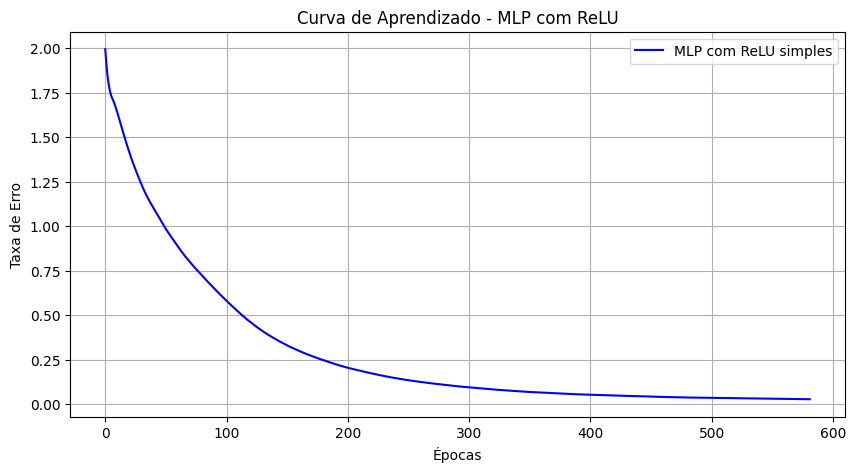

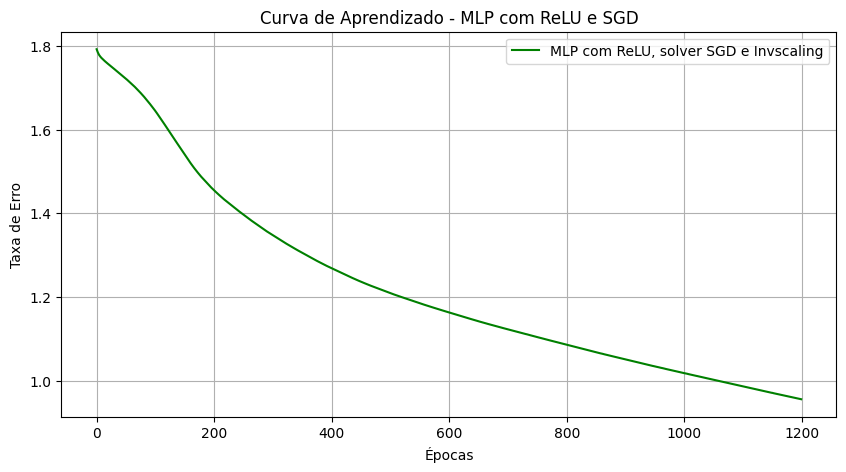

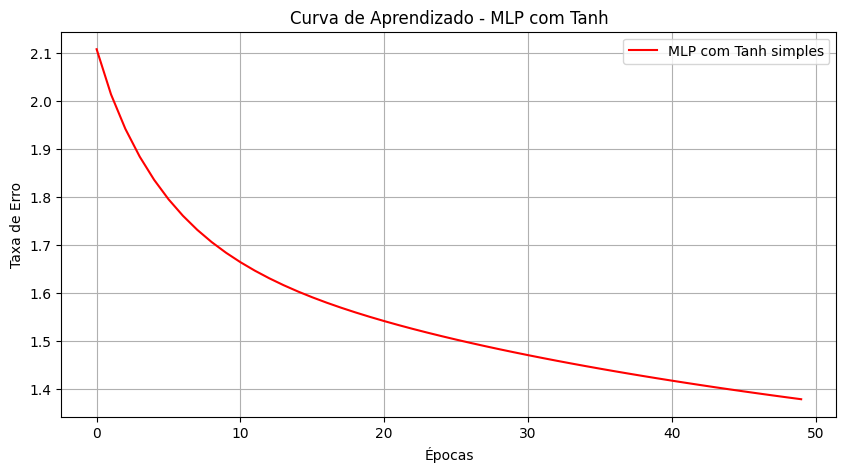

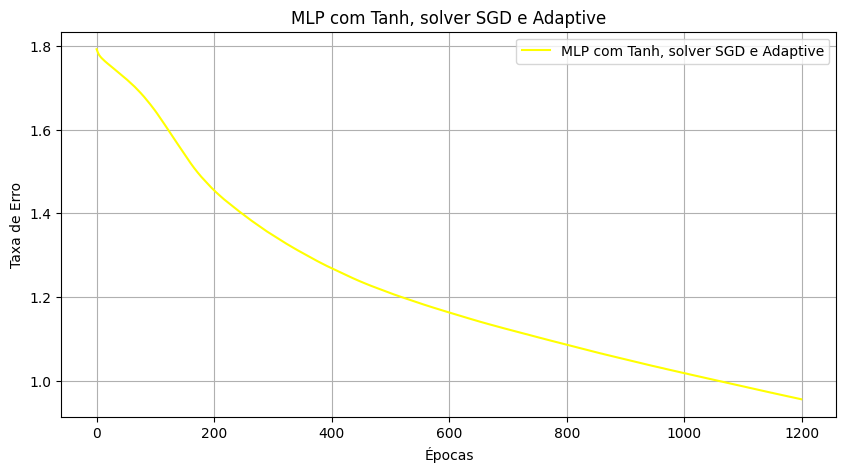

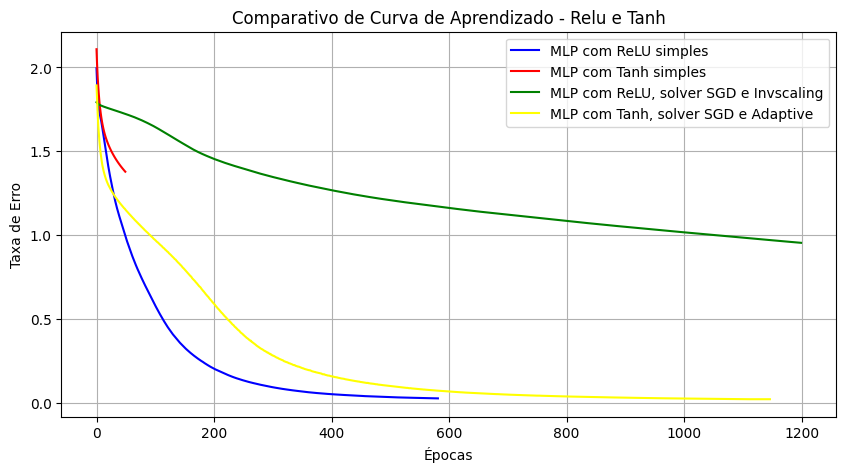

In [120]:
#Visualização do relatório do MLP
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

xlabel_t="Épocas"
ylabel_t= "Taxa de Erro"
relu_s_title="Curva de Aprendizado - MLP com ReLU"
tanh_s_title="Curva de Aprendizado - MLP com Tanh"
relu_i_title="Curva de Aprendizado - MLP com ReLU e SGD"
tanh_i_title="Curva de Aprendizado - MLP com Tanh e SGD"

relu_s_label="MLP com ReLU simples"
tanh_s_label="MLP com Tanh simples"
relu_i_label="MLP com ReLU, solver SGD e Invscaling"
tanh_i_label="MLP com Tanh, solver SGD e Adaptive"

relu_s_color="blue"
relu_i_color="green"
tanh_s_color="red"
tanh_i_color="yellow"

# Curva de aprendizado do MLP com ReLU
plt.figure(figsize=(10, 5))
plt.plot(mlp_relu_simple.loss_curve_, label=relu_s_label, color=relu_s_color)  # Access the loss curve for plotting
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title(relu_s_title)
plt.grid()
plt.legend()
plt.show()

# Curva de aprendizado do MLP com Relu e SGD
plt.figure(figsize=(10, 5))
plt.plot(mlp_relu_sgd.loss_curve_, label=relu_i_label, color=relu_i_color)  # Access the loss curve for plotting
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title(relu_i_title)
plt.grid()
plt.legend()
plt.show()

# Curva de aprendizado do MLP com Tanh
plt.figure(figsize=(10, 5))
plt.plot(mlp_tanh_simple.loss_curve_, label=tanh_s_label, color=tanh_s_color)
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title(tanh_s_title)
plt.grid()
plt.legend()
plt.show()

# Curva de aprendizado do MLP com Tanh e SGD
plt.figure(figsize=(10, 5))
plt.plot(mlp_relu_sgd.loss_curve_, label=tanh_i_label, color=tanh_i_color)
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title(tanh_i_label)
plt.grid()
plt.legend()
plt.show()

# Comparando os dois gráficos
plt.figure(figsize=(10, 5))
plt.plot(mlp_relu_simple.loss_curve_, label=relu_s_label, color=relu_s_color)  # Access the loss curve for plotting
plt.plot(mlp_tanh_simple.loss_curve_, label=tanh_s_label, color=tanh_s_color)  # Access the loss curve for plotting
plt.plot(mlp_relu_sgd.loss_curve_, label=relu_i_label, color=relu_i_color)  # Access the loss curve for plotting
plt.plot(mlp_tanh_sgd.loss_curve_, label=tanh_i_label, color=tanh_i_color)  # Access the loss curve for plotting
plt.xlabel(xlabel_t)
plt.ylabel(ylabel_t)
plt.title("Comparativo de Curva de Aprendizado - Relu e Tanh")
plt.grid()
plt.legend()
plt.show()


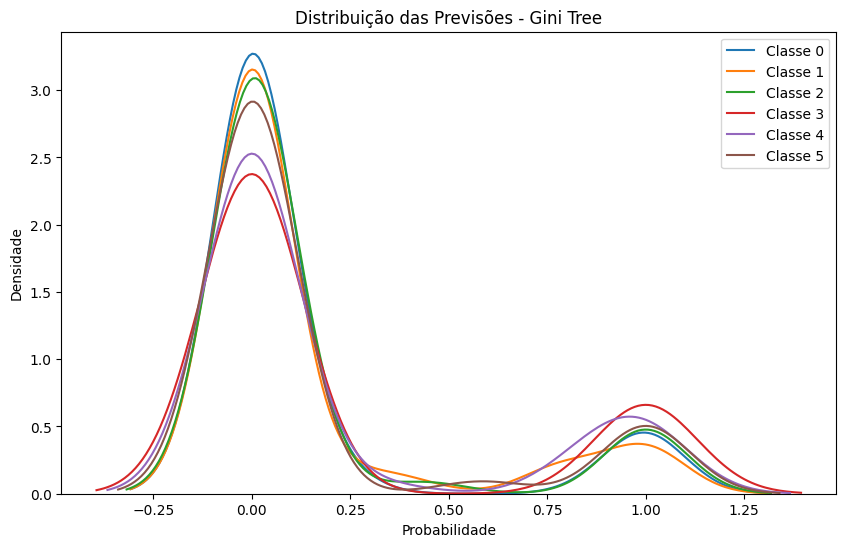

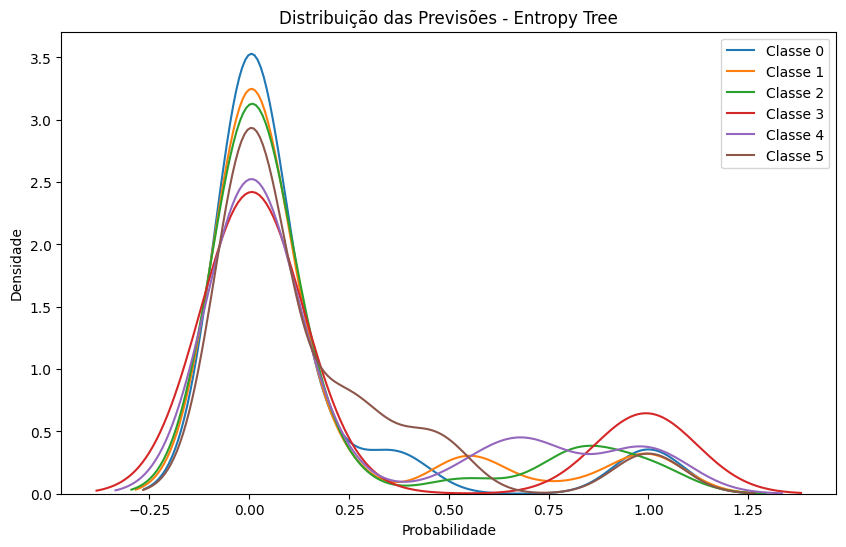

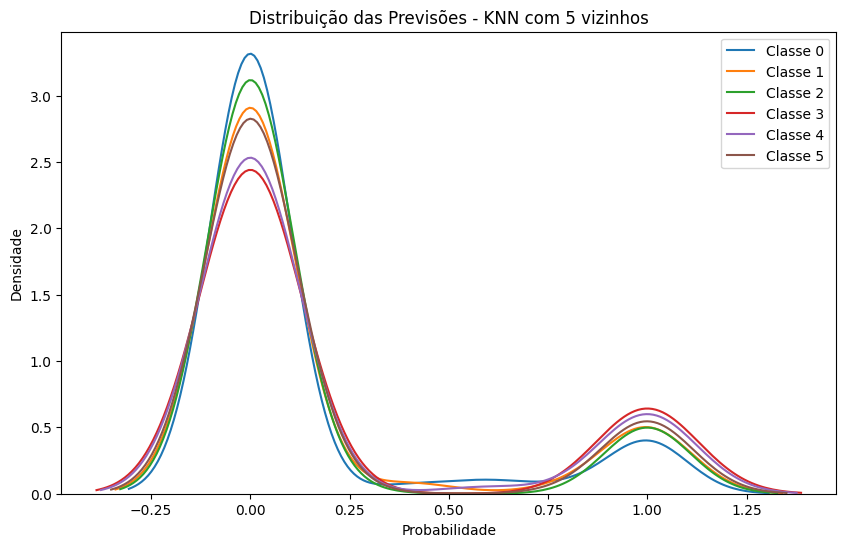

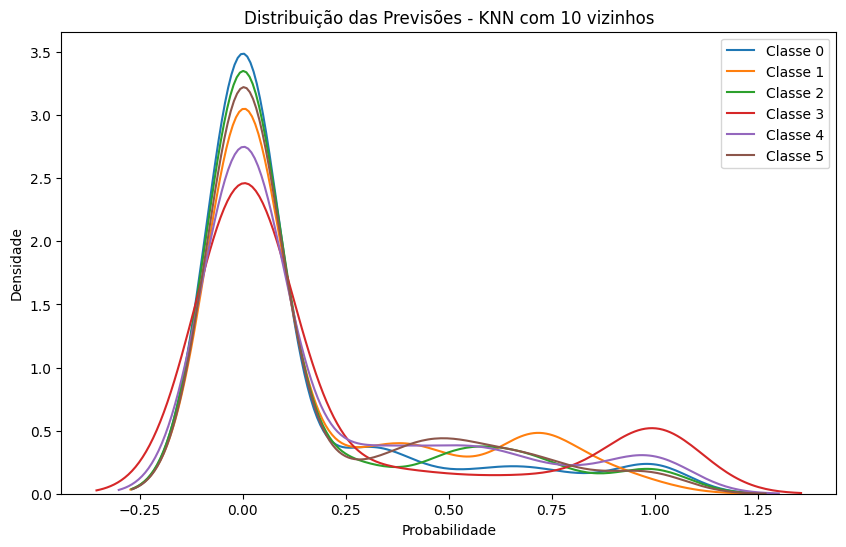

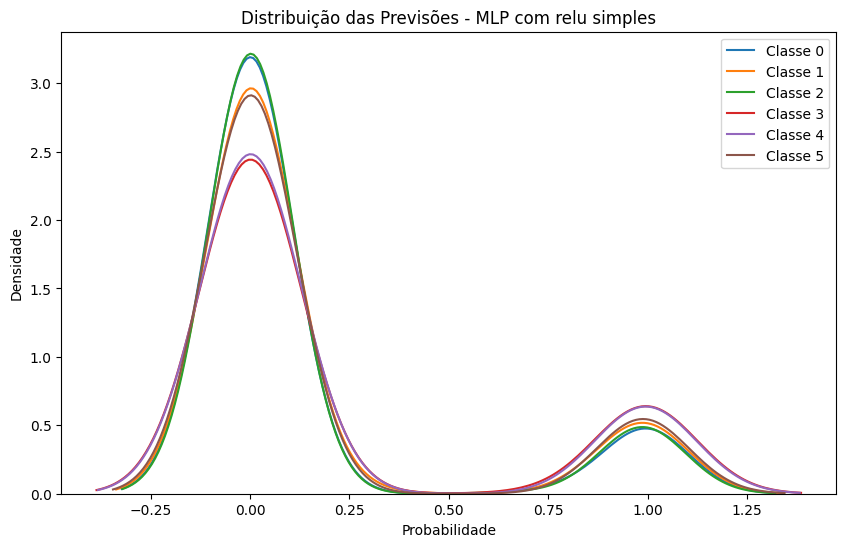

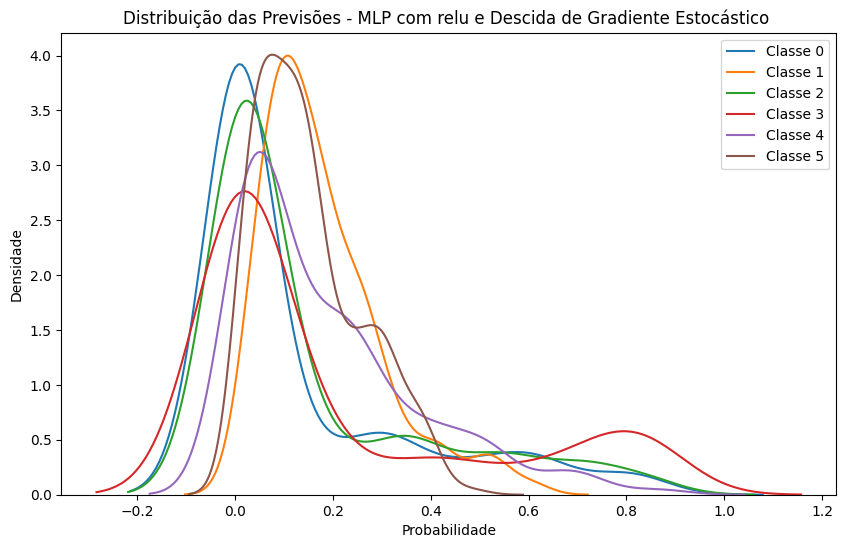

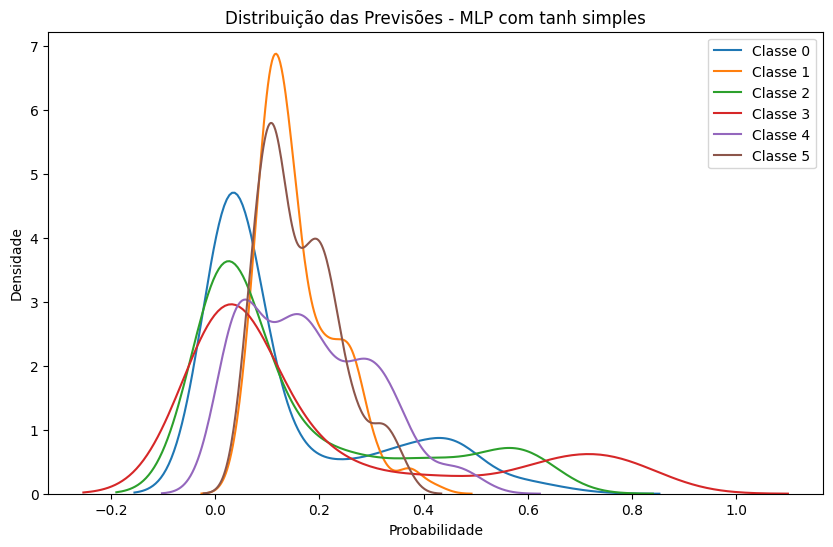

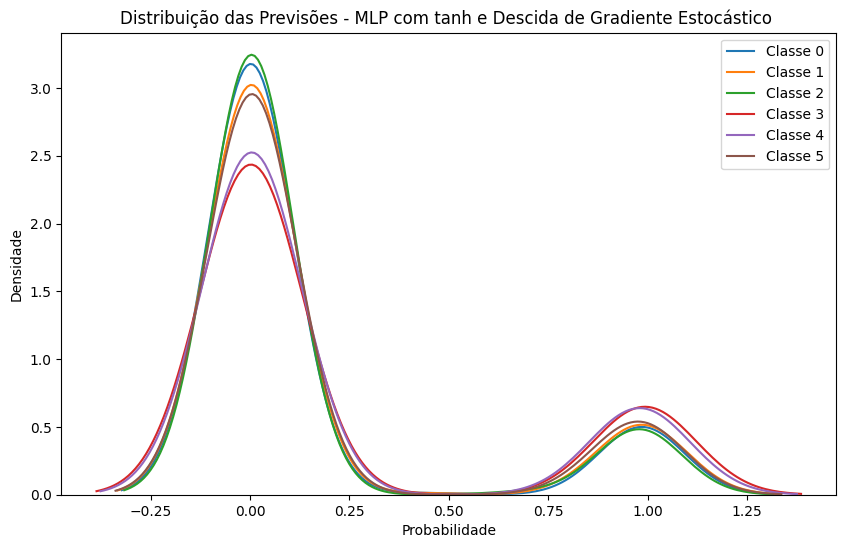

In [121]:
# Visualizar a Distribuição das Probabilidades de Previsão
def plot_prediction_distribution(model, X_test, y_test, title="Distribuição das Previsões"):
    probabilities = model.predict_proba(X_test)
    plt.figure(figsize=(10,6))

    for i in range(probabilities.shape[1]):
        sns.kdeplot(probabilities[:, i], label=f"Classe {i}")

    plt.title(title)
    plt.xlabel("Probabilidade")
    plt.ylabel("Densidade")
    plt.legend()
    plt.show()

for model in models_dict.values():
  if type(model[0]) !=KMeans:
    print()
    plot_prediction_distribution(model[0], X_test, y_test, title=f"Distribuição das Previsões - {model[1]}")

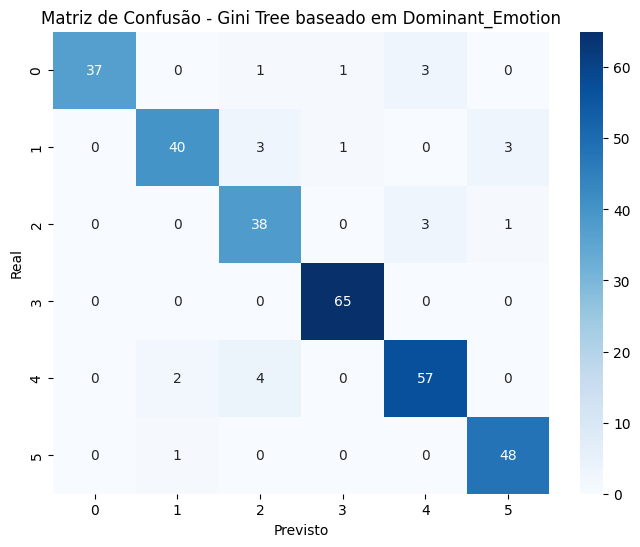

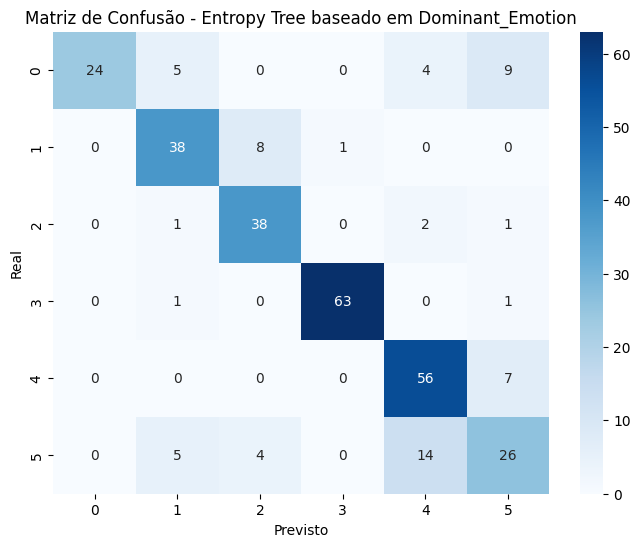

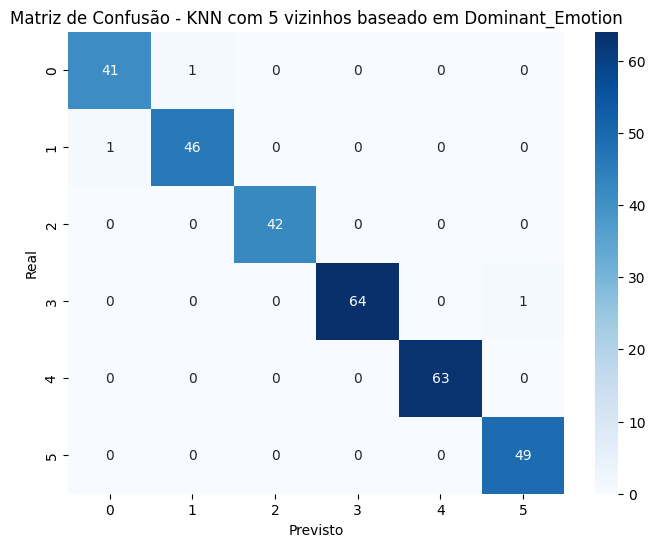

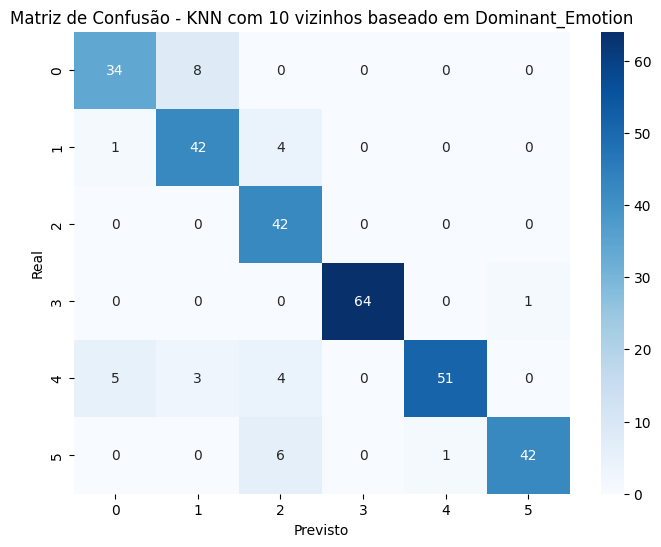

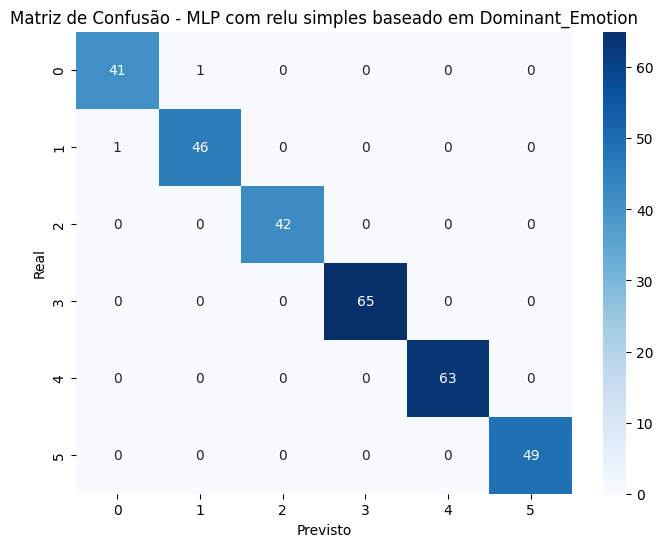

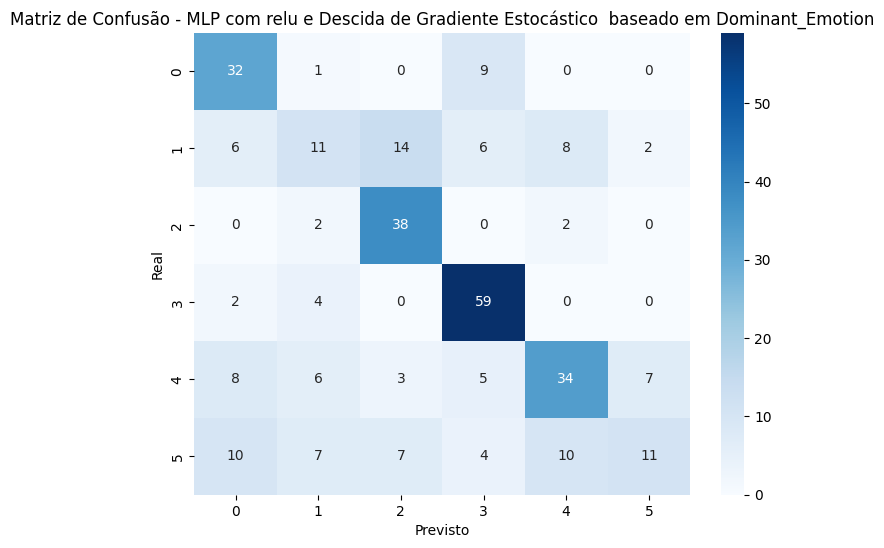

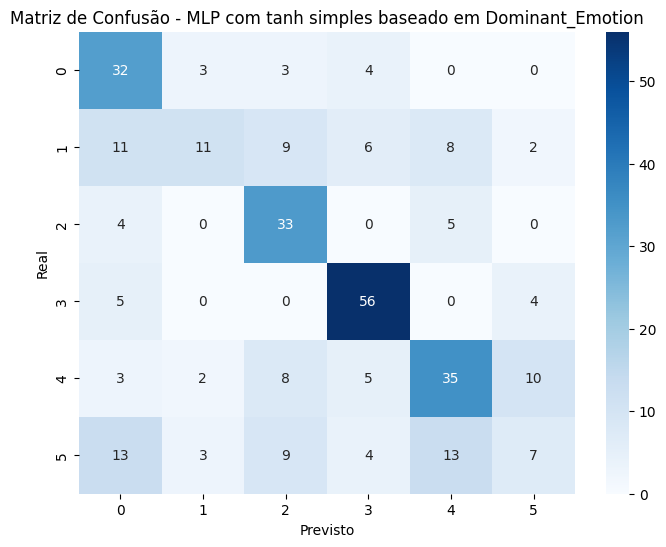

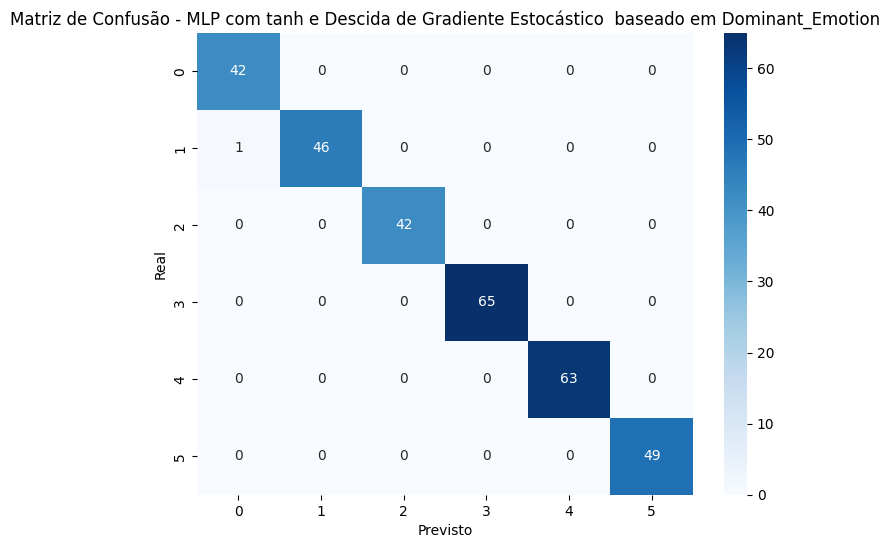

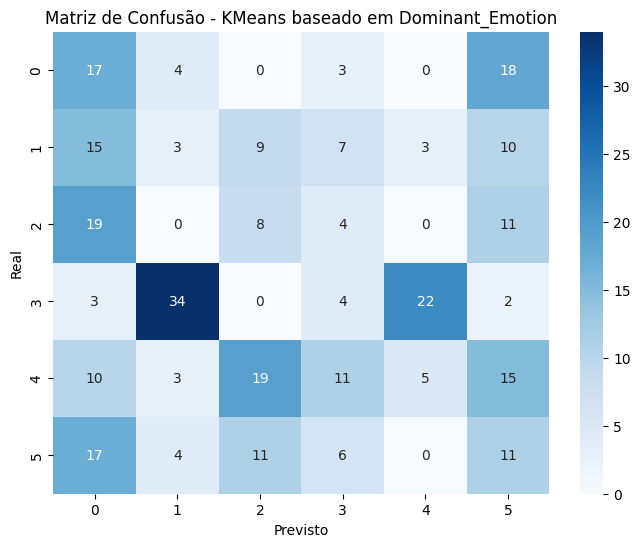

In [122]:
#Visualizar a Matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(title)
    plt.show()


for model in models_dict.values():
  print()
  plot_confusion_matrix(y_test, model[0].predict(X_test), title=f"Matriz de Confusão - {model[1]} baseado em {target_col}")